**Preliminary settings**

In [ ]:
!pip install pingouin
!pip install lets_plot
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg # Now you can import pingouin
from lets_plot import *


LetsPlot.setup_html(no_js=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Set the plot style for prettier charts:
plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [ ]:
# Crear un diccionario
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()

,Copenhagen,Dniprop,Minsk
0,14.1,11.0,12.8
1,14.1,12.6,12.3
2,13.7,12.1,12.6
3,12.9,11.2,12.3
4,12.3,11.3,11.8


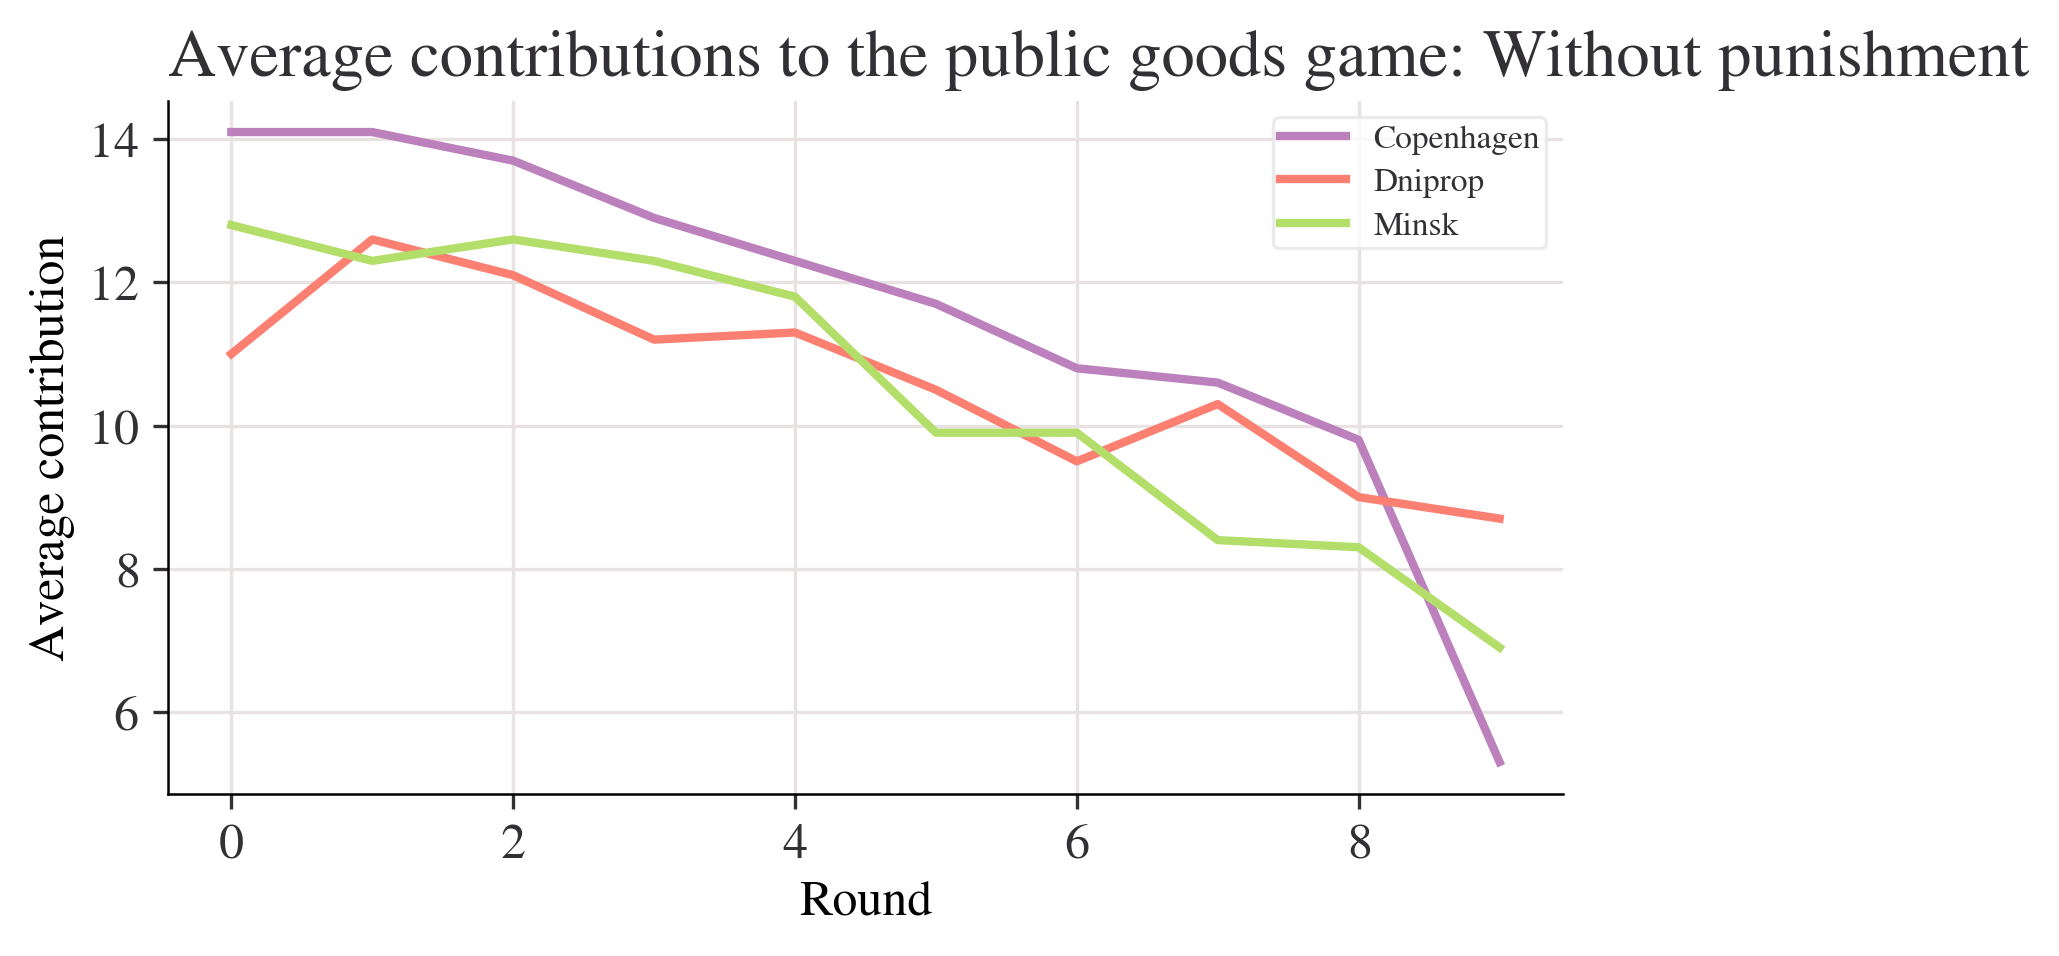

In [ ]:
# Plot the data
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

# **Part 2.1 Collecting data by playing a public goods game**


**P2.1.1**

*Make a line chart with average contribution as the vertical axis variable, and period (from 1 to 10) on the horizontal axis. Describe how average contributions have changed over the course of the game.*

In [ ]:
# URL raw del archivo en GitHub
# Updated URL to point to the raw file content
url = 'https://raw.githubusercontent.com/paugg17/Taller-4/main/Juego.xlsx'

df = pd.read_excel(url)
df.head()

,Round,Team,Contributions,Pay-offs
0,1,1​,100,-26
1,1,10​,30,44
2,1,11​,50,24
3,1,12​,50,24
4,1,2​,70,4


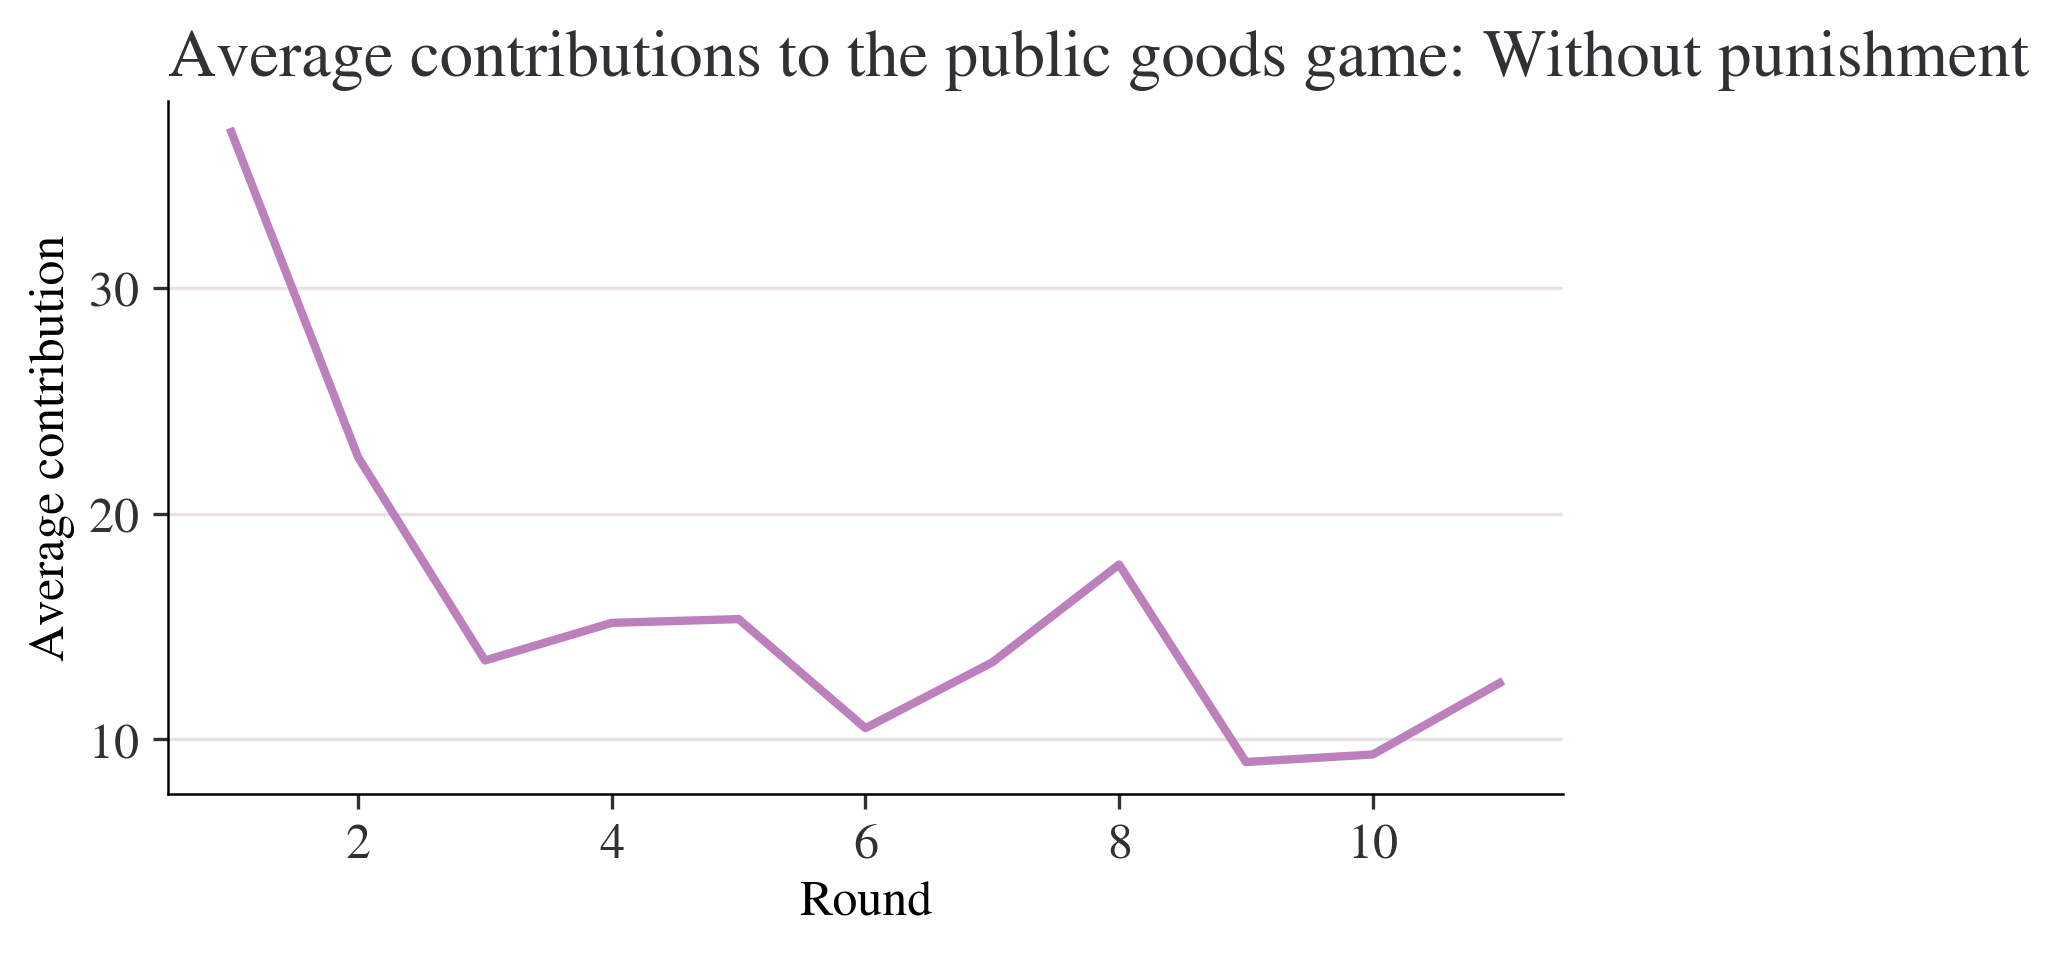

In [ ]:
Rondas = list(range(1, 12))


mean_contributions = df.groupby('Round')['Contributions'].mean()

# Plot the data
plt.plot(Rondas, mean_contributions)
plt.title("Average contributions to the public goods game: Without punishment")
plt.ylabel("Average contribution")
plt.xlabel("Round")
plt.show()

**Al principio las contribuciones son altas, pero bajan bastante en las primeras rondas. Después hay subidas y bajadas pequeñas, aunque en general se mantienen en un nivel bajo comparado con el inicio.**

*Use the data from your own experiment to answer Question 1. As an example, we will use the data for the first three cities of the dataset that will be introduced in Part 2.2.*

*Now we need to plot the data. Note that, with data in 'wide' format (one column per city) and with an index, simply calling .plot on a pandas dataframe will create a matplotlib line chart. We could also use the lets-plot package to make this kind of chart, but it expects data in 'tidy' or 'long' format”and for that, we would have to reshape the data so that the city names were values in a single column called 'city' or similar. Let's just use matplotlib for now.*

**P2.1.2**

*Compare your line chart with Figure 3 of Herrmann et al. (2008).1 Comment on any similarities or differences between the results (for example, the amount contributed at the start and end, or the change in average contributions over the course of the game).*

**Los dos gráficos muestran que las contribuciones arrancan en un punto alto y decreciendo con el tiempo. En Herrmann et al. (2008), la caída es más suave y termina casi en cero, mientras que en el gráfico del juego hay más subidas, bajadas y variación en general.**

**P2.1.3**

*Can you think of any reasons why your results are similar to (or different from) those in Figure 3? You may find it helpful to read the ‘Experiments’ section of the Herrmann et al. (2008) study for a more detailed description of how the experiments were conducted.*

Algunas razones pueden ser:
1. Incentivos más altos en nuestro experimento: El retorno de la cooperación es el doble de la contribución, mientras que el experimento de Herrmann el retorno era solo del 0.4 por cada unidad invertida. Esto incentivó una mayor cooperación inicial y fluctuaciones más marcadas en las contribuciones.

2. Diferencias en la muestra: En el estudio participaron 1,200 individuos desconocidos entre sí, mientras que el experimento los participantes eran estudiantes con algún grado de interacción previa. Esto pudo generar un mayor sentido de confianza o compromiso, afectando los patrones de cooperación.

3. Interacción social previa: En el experiemnto los participantes tuvieron oportunidad de conversar antes y durante el juego, lo que pudo influir en sus decisiones de contribución. En contraste, el estudio de Herrmann se llevó a cabo sin interacciones previas entre los participantes, reduciendo posibles efectos de comunicación o acuerdos informales.

# **Part 2.2 Describing the data**

P2.2.1 Using the data for Figures 2A and 3 of Herrmann et al. (2008):

- *Calculate the mean contribution in each period (row) separately for both experimentes*
- *Plot a line chart of mean contribution on the vertical axis and time period (from 1 to 10) on the horizontal axis (with a separate line for each experiment). Make sure the lines in the legend are clearly labelled according to the experiment (with punishment or without punishment).*
- *Describe any differences and similarities you see in the mean contribution over time in both experiments.*

In [ ]:
url_1= 'https://raw.githubusercontent.com/paugg17/Taller-4/main/doing-economics-datafile-working-in-excel-project-2-2.xlsx'

In [ ]:
data_np = pd.read_excel(
   url_1,
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


In [ ]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Copenhagen       10 non-null     float64
 1   Dnipropetrovs’k  10 non-null     float64
 2   Minsk            10 non-null     float64
 3   St. Gallen       10 non-null     float64
 4   Muscat           10 non-null     float64
 5   Samara           10 non-null     float64
 6   Zurich           10 non-null     float64
 7   Boston           10 non-null     float64
 8   Bonn             10 non-null     float64
 9   Chengdu          10 non-null     float64
 10  Seoul            10 non-null     float64
 11  Riyadh           10 non-null     float64
 12  Nottingham       10 non-null     float64
 13  Athens           10 non-null     float64
 14  Istanbul         10 non-null     float64
 15  Melbourne        10 non-null     float64
dtypes: float64(16)
memory usage: 1.3+ KB


In [ ]:
data_n

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,14.102941,10.954545,12.79410,13.687500,9.53846,10.84210,11.08330,12.96430,10.850000,10.0000,8.250000,7.958333,10.928571,8.136364,8.937500,8.225
2,14.132353,12.636363,12.33820,12.802067,10.98080,11.50000,12.16670,12.71430,10.800000,9.9625,9.142857,7.729167,10.535714,6.272727,9.015625,7.325
3,13.720588,12.068182,12.58820,12.354184,11.51920,11.72370,10.78130,12.71430,11.516667,10.2250,9.892857,7.187500,9.125000,6.409091,8.437500,6.250
4,12.897059,11.181818,12.26470,10.604183,10.30770,11.30920,10.63540,11.35710,10.700000,10.0125,9.666667,7.875000,8.982143,6.318182,6.921875,5.975
5,12.338235,11.272727,11.82350,10.989583,9.82692,10.33550,8.52083,11.03570,10.700000,9.1000,9.011905,7.895833,8.071428,6.727272,5.812500,5.425
6,11.676471,10.477273,9.88235,10.708317,10.28850,10.20390,7.10417,10.14290,9.416667,7.7000,8.559524,7.791667,5.410714,6.318182,4.546875,5.050
7,10.779412,9.454545,9.88235,10.145817,10.19230,8.71710,7.41667,9.05357,7.683333,6.6375,7.892857,8.145834,5.339286,5.863636,3.921875,4.275
8,10.632353,10.340909,8.42647,9.510415,10.11540,8.23684,7.31250,6.17857,8.566667,6.0125,7.130952,8.291667,4.660714,6.250000,3.156250,3.200
9,9.764706,9.022727,8.26471,7.374998,9.55769,8.17763,6.21875,4.16071,7.400000,4.5125,5.857143,7.541667,4.053571,5.909091,2.171875,2.300


In [ ]:
data_p

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,15.411765,9.477273,11.750000,15.041667,9.211538,10.763158,13.228261,16.017857,12.050000,9.895833,9.690476,6.145833,11.321428,5.818182,6.546875,7.850
2,16.970589,9.909091,13.235294,16.718750,10.307693,11.302631,15.021739,17.821428,13.466666,11.062500,12.107142,6.770833,13.892858,5.636364,6.578125,10.475
3,17.735294,11.840909,12.897058,17.572916,10.057693,11.743421,15.771739,18.553572,14.083333,12.312500,13.273809,6.708333,14.696428,5.863636,6.718750,12.800
4,18.161764,11.454545,13.382353,17.427084,10.000000,11.763158,16.260870,18.875000,14.033334,13.375000,14.107142,7.937500,14.410714,6.250000,6.453125,13.575
5,18.367647,12.681818,13.970589,17.645834,9.576923,11.190789,16.358696,18.232143,15.416667,14.354167,14.392858,7.604167,15.267858,6.227273,6.968750,15.050
6,18.691177,11.750000,13.014706,17.343750,9.903846,12.184211,16.619566,18.553572,14.416667,15.427083,15.285714,7.604167,16.446428,5.863636,7.156250,15.775
7,18.735294,11.227273,13.176471,16.791666,10.269231,12.151316,17.195652,18.678572,15.216666,15.687500,16.047619,6.250000,16.375000,5.636364,7.531250,16.225
8,18.323530,10.681818,13.691176,16.750000,10.846154,12.184211,17.032608,18.053572,15.500000,15.979167,16.809525,6.375000,16.732143,4.840909,7.843750,16.525
9,18.073530,9.704545,12.411765,16.885416,9.711538,12.388158,17.565218,18.178572,16.000000,15.854167,17.285715,7.125000,16.303572,4.681818,7.843750,17.100


In [ ]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)
mean_p_c

<ipython-input-22-4d2577de781f>:2: FutureWarning: The provided callable <function mean at 0x7b3d3b3bd3a0> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)


,0
Period,
1,10.638759
2,11.954794
3,12.664337
4,12.966662
5,13.331636
6,13.502236
7,13.574680
8,13.635535
9,13.569548


**Plot the mean contribution**

*Now we will produce a line chart showing the mean contributions.*

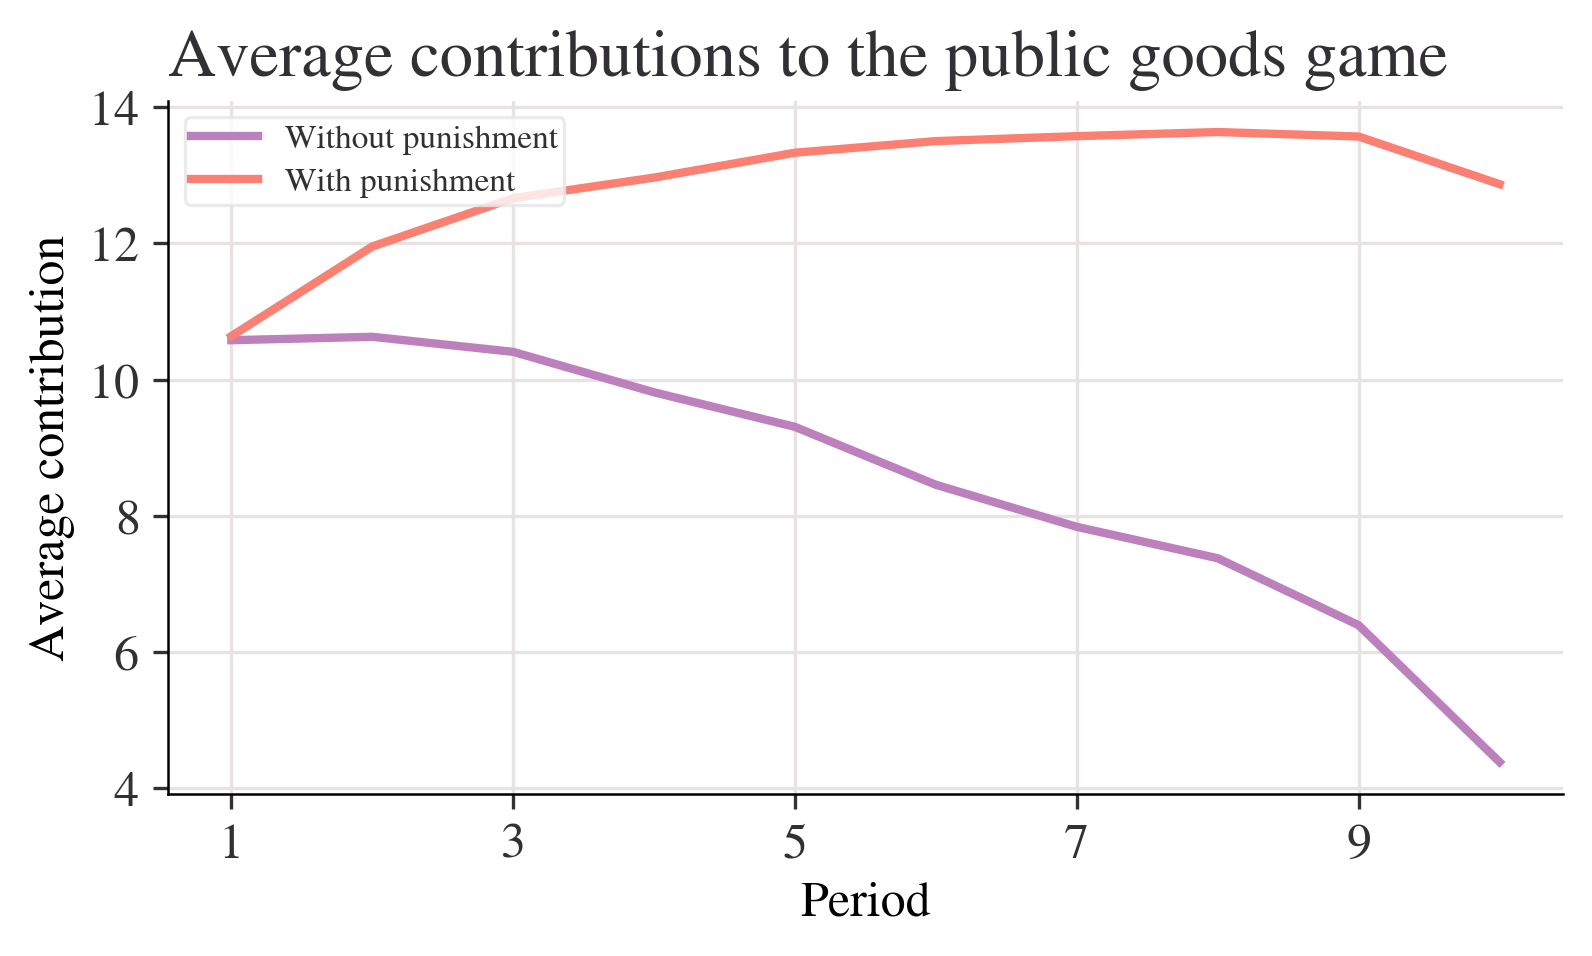

In [ ]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

El grafico de lineas muestra grandes diferencias entre tener o no castigo. Sin castigo, las contribuciones bajan con el tiempo, lo que refleja comportamientos egoístas. En cambio, con castigo, las contribuciones suben y se mantienen altas, ya que la posibilidad de sanciones motiva a cooperar. Esto sugiere que el castigo ayuda a sostener la cooperación y frena el free-riding en juegos de bienes públicos.

**P2.2.2**

*Instead of looking at all periods, we can focus on contributions in the first and last period. Plot a column chart showing the mean contribution in the first and last period for both experiments.*

In [ ]:
# Extraer los valores de la contribución promedio en el primer y último período
first_period_n = mean_n_c.iloc[0]  # Primer período sin castigo
last_period_n = mean_n_c.iloc[-1]  # Último período sin castigo

first_period_p = mean_p_c.iloc[0]  # Primer período con castigo
last_period_p = mean_p_c.iloc[-1]  # Último período con castigo

In [ ]:
# Datos para el gráfico
labels = ["First Period", "Last Period"]
no_punishment = [first_period_n, last_period_n]
punishment = [first_period_p, last_period_p]

x = np.arange(len(labels))  # Posiciones en el eje x
width = 0.35  # Ancho de las barras

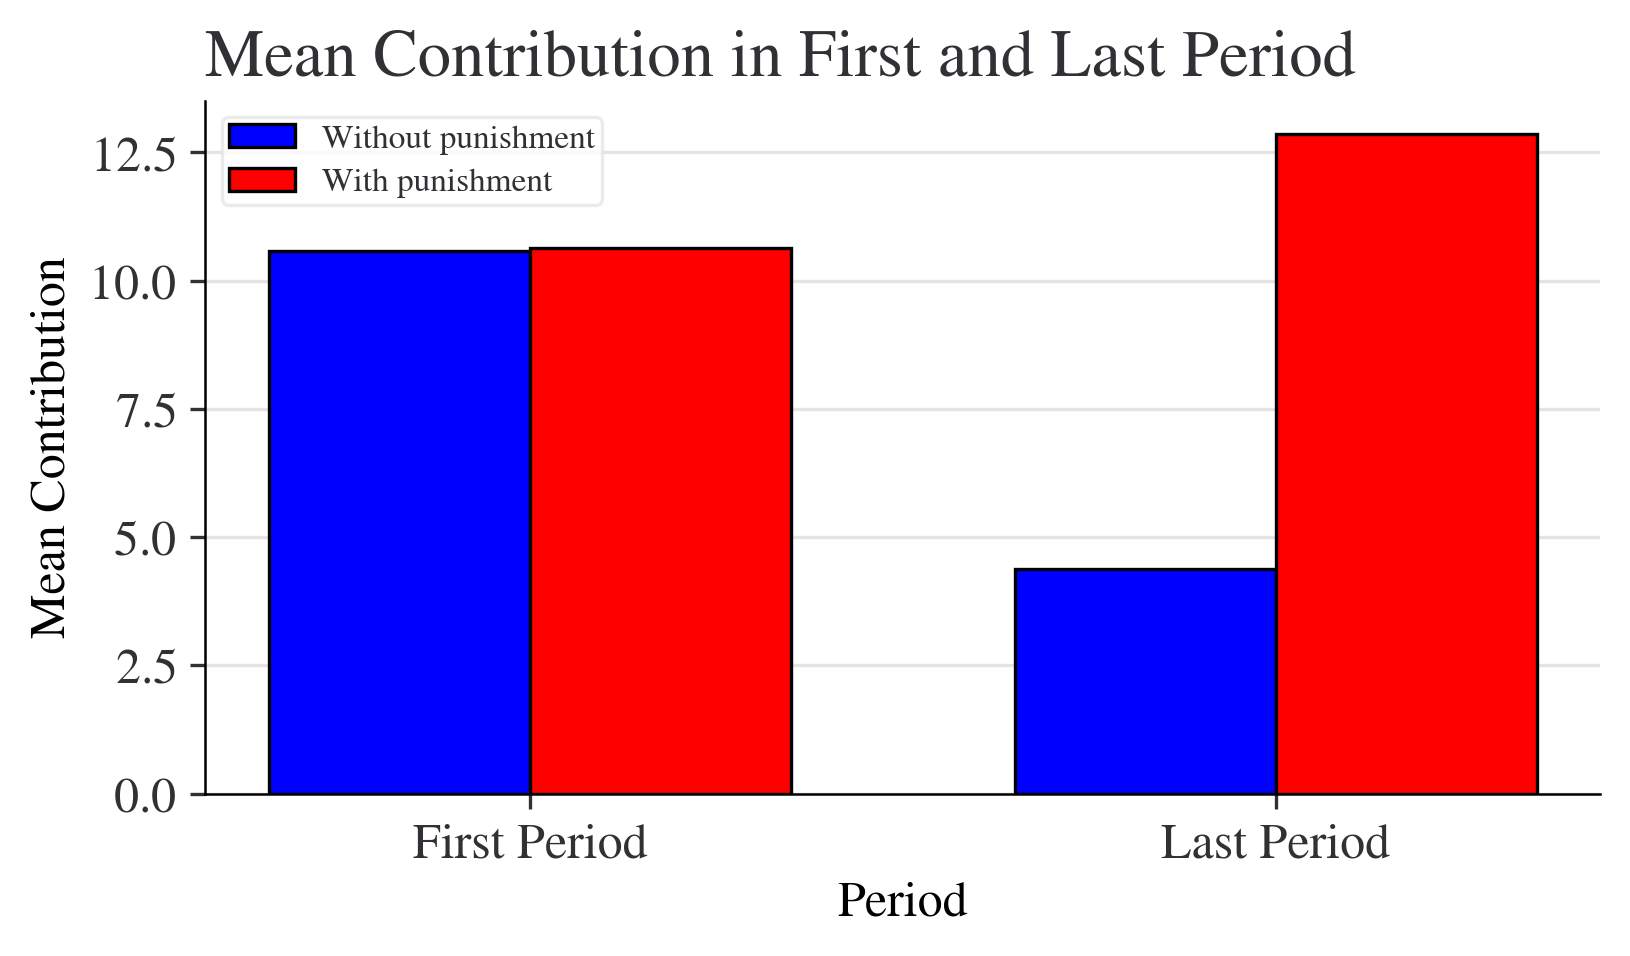

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, no_punishment, width, label="Without punishment", color="blue")
bars2 = ax.bar(x + width/2, punishment, width, label="With punishment", color="red")

# Etiquetas y grafico
ax.set_xlabel("Period")
ax.set_ylabel("Mean Contribution")
ax.set_title("Mean Contribution in First and Last Period")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

El gráfico muestra que al inicio las contribuciones son parecidas en ambos casos, lo que refleja cooperación sin grandes diferencias. Pero al final, en la condición sin castigo bajan bastante, mientras que con castigo se mantienen altas o incluso suben. Esto sugiere que el castigo ayuda a sostener la cooperación y evita que se venga abajo con el tiempo.

**P2.2.3**

*Calculate the standard deviation for Periods 1 and 10 separately, for both experiments. Does the rule of thumb apply? (In other words, are most values within two standard deviations of the mean?)*

In [ ]:
# Extraer los valores de contribución para el Periodo 1 y Periodo 10
contributions_n_p1 = data_n.iloc[0, :].values.astype(float)  # Period 1, Without Punishment
contributions_n_p10 = data_n.iloc[-1, :].values.astype(float)  # Period 10, Without Punishment

contributions_p_p1 = data_p.iloc[0, :].values.astype(float)  # Period 1, With Punishment
contributions_p_p10 = data_p.iloc[-1, :].values.astype(float)  # Period 10, With Punishment

In [ ]:
# Calcular la desviación estándar para cada conjunto de datos
std_n_p1 = np.std(contributions_n_p1, ddof=1)  # Desviación estándar en Periodo 1 (Without Punishment)
std_n_p10 = np.std(contributions_n_p10, ddof=1)  # Desviación estándar en Periodo 10 (Without Punishment)

std_p_p1 = np.std(contributions_p_p1, ddof=1)  # Desviación estándar en Periodo 1 (With Punishment)
std_p_p10 = np.std(contributions_p_p10, ddof=1)  # Desviación estándar en Periodo 10 (With Punishment)


In [ ]:
# Mostrar resultados
print(f"Standard Deviation - Without Punishment (Period 1): {std_n_p1:.2f}")
print(f"Standard Deviation - Without Punishment (Period 10): {std_n_p10:.2f}")
print(f"Standard Deviation - With Punishment (Period 1): {std_p_p1:.2f}")
print(f"Standard Deviation - With Punishment (Period 10): {std_p_p10:.2f}")

Standard Deviation - Without Punishment (Period 1): 2.02
Standard Deviation - Without Punishment (Period 10): 2.19
Standard Deviation - With Punishment (Period 1): 3.21
Standard Deviation - With Punishment (Period 10): 3.90


In [ ]:
# Verificación de la regla de las dos desviaciones estándar
mean_period_1 = 10.6  # Media dada para Periodo 1 en ambos experimentos
within_2_std_n_p1 = np.sum((contributions_n_p1 >= mean_period_1 - 2*std_n_p1) & (contributions_n_p1 <= mean_period_1 + 2*std_n_p1)) / len(contributions_n_p1)
within_2_std_p_p1 = np.sum((contributions_p_p1 >= mean_period_1 - 2*std_p_p1) & (contributions_p_p1 <= mean_period_1 + 2*std_p_p1)) / len(contributions_p_p1)

print(f"Percentage of values within 2 std devs (Without Punishment, Period 1): {within_2_std_n_p1:.2%}")
print(f"Percentage of values within 2 std devs (With Punishment, Period 1): {within_2_std_p_p1:.2%}")

Percentage of values within 2 std devs (Without Punishment, Period 1): 100.00%
Percentage of values within 2 std devs (With Punishment, Period 1): 100.00%


Aunque en el Periodo 1 la media fue de 10.6 en ambos casos, no significa que los datos sean iguales. La condición con castigo tuvo una desviación estándar mayor (3.21 vs. 2.02), lo que muestra más variabilidad en las contribuciones. O sea, hubo más diferencias entre lo que aportó cada participante. Aunque todos los valores están dentro de dos desviaciones estándar, la distribución no es la misma en ambos experimentos.

**P2.2.4**

*Calculate the maximum and minimum value for Periods 1 and 10 separately, for both experiments.*

In [ ]:
# Without Punishment
max_n_p1 = np.max(contributions_n_p1)
min_n_p1 = np.min(contributions_n_p1)

max_n_p10 = np.max(contributions_n_p10)
min_n_p10 = np.min(contributions_n_p10)

In [ ]:
# With Punishment
max_p_p1 = np.max(contributions_p_p1)
min_p_p1 = np.min(contributions_p_p1)

max_p_p10 = np.max(contributions_p_p10)
min_p_p10 = np.min(contributions_p_p10)

In [ ]:
# Mostrar los resultados
print(f"Max - Without Punishment (Period 1): {max_n_p1}")
print(f"Min - Without Punishment (Period 1): {min_n_p1}")
print(f"Max - Without Punishment (Period 10): {max_n_p10}")
print(f"Min - Without Punishment (Period 10): {min_n_p10}")

Max - Without Punishment (Period 1): 14.102941176470589
Min - Without Punishment (Period 1): 7.958333416666666
Max - Without Punishment (Period 10): 8.681818181818182
Min - Without Punishment (Period 10): 1.3


In [ ]:
print(f"Max - With Punishment (Period 1): {max_p_p1}")
print(f"Min - With Punishment (Period 1): {min_p_p1}")
print(f"Max - With Punishment (Period 10): {max_p_p10}")
print(f"Min - With Punishment (Period 10): {min_p_p10}")

Max - With Punishment (Period 1): 16.01785659790039
Min - With Punishment (Period 1): 5.818181991577148
Max - With Punishment (Period 10): 17.511905670166016
Min - With Punishment (Period 10): 6.204545497894287


**P2.2.5**

*Create a table of summary statistics that displays mean, variance, standard deviation, minimum, maximum and range for Periods 1 and 10 and for both experiments.*

In [ ]:
# Calcular estadísticas
mean_n_p1 = np.mean(contributions_n_p1)
mean_n_p10 = np.mean(contributions_n_p10)
mean_p_p1 = np.mean(contributions_p_p1)
mean_p_p10 = np.mean(contributions_p_p10)

var_n_p1 = np.var(contributions_n_p1, ddof=1)
var_n_p10 = np.var(contributions_n_p10, ddof=1)
var_p_p1 = np.var(contributions_p_p1, ddof=1)
var_p_p10 = np.var(contributions_p_p10, ddof=1)

std_n_p1 = np.std(contributions_n_p1, ddof=1)
std_n_p10 = np.std(contributions_n_p10, ddof=1)
std_p_p1 = np.std(contributions_p_p1, ddof=1)
std_p_p10 = np.std(contributions_p_p10, ddof=1)

max_n_p1 = np.max(contributions_n_p1)
min_n_p1 = np.min(contributions_n_p1)
max_n_p10 = np.max(contributions_n_p10)
min_n_p10 = np.min(contributions_n_p10)

max_p_p1 = np.max(contributions_p_p1)
min_p_p1 = np.min(contributions_p_p1)
max_p_p10 = np.max(contributions_p_p10)
min_p_p10 = np.min(contributions_p_p10)

range_n_p1 = max_n_p1 - min_n_p1
range_n_p10 = max_n_p10 - min_n_p10
range_p_p1 = max_p_p1 - min_p_p1
range_p_p10 = max_p_p10 - min_p_p10

In [ ]:
# Crear la tabla de resumen
summary_table = pd.DataFrame({
    "Experiment": ["Without Punishment", "Without Punishment", "With Punishment", "With Punishment"],
    "Period": [1, 10, 1, 10],
    "Mean": [mean_n_p1, mean_n_p10, mean_p_p1, mean_p_p10],
    "Variance": [var_n_p1, var_n_p10, var_p_p1, var_p_p10],
    "Standard Deviation": [std_n_p1, std_n_p10, std_p_p1, std_p_p10],
    "Minimum": [min_n_p1, min_n_p10, min_p_p1, min_p_p10],
    "Maximum": [max_n_p1, max_n_p10, max_p_p1, max_p_p10],
    "Range": [range_n_p1, range_n_p10, range_p_p1, range_p_p10]
})

In [ ]:
# Mostrar la tabla en Google Colab
from IPython.display import display
display(summary_table)  # Usar display() para visualizar la tabla en Colab

,Experiment,Period,Mean,Variance,Standard Deviation,Minimum,Maximum,Range
0,Without Punishment,1,10.578313,4.083325,2.020724,7.958333,14.102941,6.144608
1,Without Punishment,10,4.383769,4.783520,2.187126,1.300000,8.681818,7.381818
2,With Punishment,1,10.638759,10.286506,3.207258,5.818182,16.017857,10.199675
3,With Punishment,10,12.869879,15.194557,3.898020,6.204545,17.511906,11.307360


Las distribuciones cambian tanto con el tiempo como entre condiciones. **Sin castigo**, las contribuciones bajan con el tiempo, mostrando una caída en la cooperación. **Con castigo**, se mantienen o suben, lo que indica un efecto positivo de las sanciones. Además, la condición con castigo tiene más variabilidad en las decisiones (mayor desviación estándar y rango), mientras que sin castigo los aportes se agrupan en niveles bajos. Ambas arrancan con la misma media (10.6) y la mayoría de los valores están dentro de dos desviaciones estándar, lo que muestra cierta normalidad en la distribución. En resumen, el castigo ayuda a sostener la cooperación, aunque genera más diversidad en el comportamiento individual.

# **Part 2.3 How did changing the rules of the game affect behaviour?**

**P2.3.1**

*First, flip a coin six times, using one hand only, and record the results (for example, Heads, Heads, Tails, etc.). Then, using the same hand, flip a coin six times and record the results again.*

- *Compare the outcomes from Question 1(a). Did you get the same number of heads in both cases? Even if you did, was the sequence of the outcomes (for example, Heads, Tails, Tails …) the same in both cases?*

In [ ]:
  # Crear la tabla
coin_flips = pd.DataFrame({
    "Throw 1": ["T", "H", "T", "T", "H", "T"],
    "Throw 2": ["H", "H", "T", "H", "T", "H"]
})

# Mostrar la tabla
display(coin_flips)

# Contar número de "H" en cada serie
heads_throw_1 = coin_flips["Throw 1"].value_counts().get("H", 0)
heads_throw_2 = coin_flips["Throw 2"].value_counts().get("H", 0)

# Mostrar los resultados de manera clara
print(f"Número de Heads en Throw 1: {heads_throw_1}")
print(f"Número de Heads en Throw 2: {heads_throw_2}")

,Throw 1,Throw 2
0,T,H
1,H,H
2,T,T
3,T,H
4,H,T
5,T,H


Número de Heads en Throw 1: 2
Número de Heads en Throw 2: 4


No son las mismas.

**P2.3.2.**

*Use the ttest function to calculate the p-value for the difference in means in Period 1 (with and without punishment).*

In [ ]:
# Prueba t para muestras independientes (Period 1)
from scipy import stats  # Import the stats module from scipy
t_stat, p_value = stats.ttest_ind(contributions_n_p1, contributions_p_p1, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -0.0638
p-value: 0.9496


*What does this p-value tell us about the difference in means in Period 1?*

Al hacer la prueba t para comparar las contribuciones en el Periodo 1 (con y sin castigo), el p-value fue de 0.9496, lo cual es altísimo. Esto indica que no hay una diferencia significativa entre los dos grupos al inicio. En resumen, ambos empezaron con niveles de cooperación muy parecidos, y cualquier diferencia que se vea ahí es pura casualidad. Básicamente, el efecto del castigo todavía no se nota en ese punto del experimento.

**P2.3.3.**

*Use the ttest function to calculate the p-value for the difference in means in Period 10 (with and without punishment).*

In [ ]:
from scipy.stats import ttest_ind

# Prueba t para Periodo 10
t_stat_10, p_value_10 = ttest_ind(contributions_n_p10, contributions_p_p10, equal_var=False)

print(f"t-statistic (Period 10): {t_stat_10:.4f}")
print(f"p-value (Period 10): {p_value_10:.4f}")


t-statistic (Period 10): -7.5944
p-value (Period 10): 0.0000


*What does this p-value tell us about the relationship between punishment, and behaviour in the public goods game?*

El p-value cercano a cero muestra que sí hay una diferencia clara entre los grupos al final del experimento; el castigo tuvo un efecto real en el comportamiento de los participantes. Mientras que sin castigo las contribuciones bajaron bastante, con castigo se mantuvieron altas por lo que la amenaza de sanciones ayuda a sostener la cooperación en el juego de bienes públicos, evitando que los participantes caigan en el free-riding.

*With reference to Figure 2.7 and Figure 2.8, explain why we cannot use the size of the difference to directly conclude whether the difference could be due to chance.*

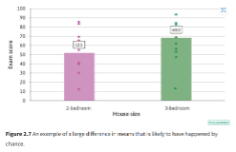

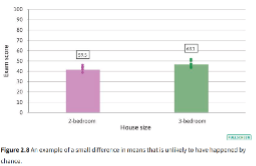

En la Figura 2.7 la diferencia entre las medias parece grande pero también existe mucha variabilidad en los datos (los puntos están más dispersos), lo que hace más probable que esa diferencia se deba al azar. En cambio, en la Figura 2.8, aunque la diferencia entre las medias es más pequeña, los datos son mucho más consistentes (menos dispersos), lo que indica que es menos probable que esa diferencia sea aleatoria.

**P2.3.4.**

*Which characteristics of the experimental setting make it likely that the with punishment option was the cause of the change in behaviour?*

- Es probable que el castigo haya sido la causa del cambio en el comportamiento porque fue la única diferencia entre los dos grupos. Todo lo demás en el experimento se mantuvo igual, así que si las personas con castigo se comportaron diferente, lo más lógico es que haya sido por eso. Además, como los participantes se repartieron de forma aleatoria, no había razones externas que explicaran esa diferencia. También se nota que el cambio no fue inmediato, sino que se dio con el tiempo, lo que muestra que el castigo tuvo un efecto real y sostenido.

*Using Figure 2.6, explain why we need to compare the two groups in Period 1 in order to conclude that there is a causal link between the with punishment option and behaviour in the game.*

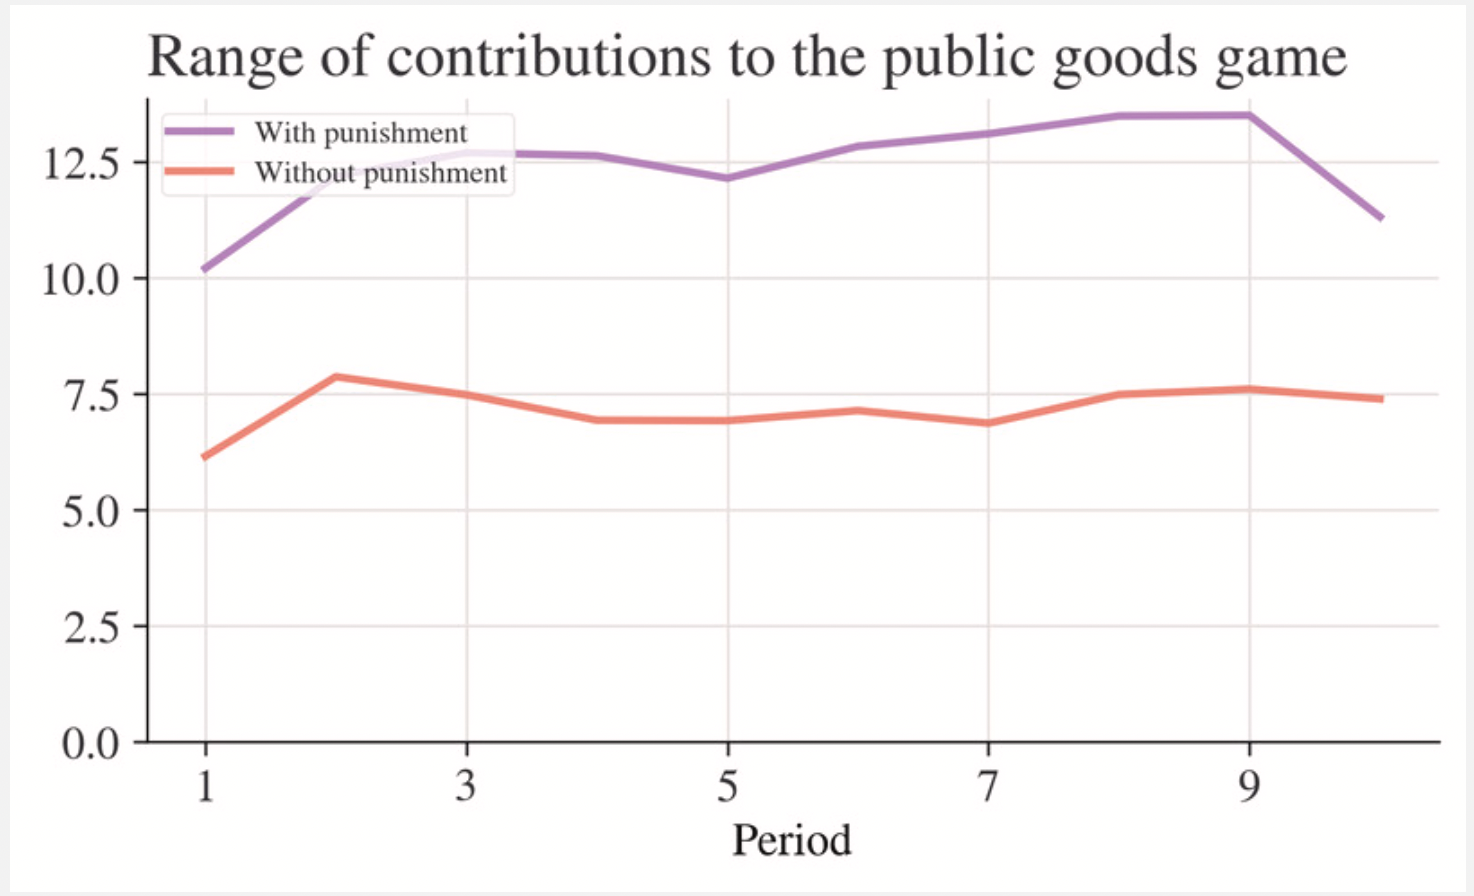

- Para saber si el castigo fue lo que cambió el comportamiento es importante mirar cómo empezaron los dos grupos en el Periodo 1. Si desde el principio ya eran diferentes, no podemos decir que fue el castigo lo que causó el cambio. Pero si ambos arrancaron parecidos y luego el grupo con castigo empieza a cambiar, ahí sí tiene más sentido decir que fue por el castigo. En la figura se ve que el rango en el grupo con castigo es más alto con el tiempo, pero sin comparar cómo estaban al inicio, no podemos sacar conclusiones claras.

**P2.3.5.**

*Discuss some limitations of experiments, and suggest some ways to address (or partially address) them. (You may find pages 158–171 of the paper ‘What do laboratory experiments measuring social preferences reveal about the real world?’ helpful, as well as the discussion on free riding and altruism in Section 2.6 of Economy, Society, and Public Policy.)*

- Una de las principales limitaciones de los experimentos es que se realizan en entornos muy controlados y artificiales, lo cual no siempre refleja cómo se comportan las personas en la vida real. Por ejemplo, los participantes suelen saber que están siendo observados, lo que puede hacer que actúen de forma más “buena” o cooperativa de lo que harían normalmente. Además, muchos estudios se hacen con estudiantes, que no necesariamente representan a la población general. También influyen factores como el contexto del experimento, el lenguaje usado o el hecho de que en el laboratorio las decisiones no siempre tienen consecuencias reales o a largo plazo.

- Para reducir estas limitaciones, se pueden usar experimentos de campo, que imitan situaciones reales fuera del laboratorio, o trabajar con muestras más diversas. También es útil complementar los resultados experimentales con teoría económica, para entender mejor en qué medida se pueden aplicar a otros contextos. Finalmente, reconocer que factores como el anonimato, las normas sociales o el tamaño de los incentivos pueden cambiar el comportamiento, ayuda a interpretar mejor los resultados.